In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use("ggplot")

In [4]:
df = pd.read_csv("../data/processed/adult_clean.csv")

In [9]:
os.makedirs("../outputs/figures", exist_ok=True)

In [ ]:
# Histogram shows the distribution of ages in the dataset.
# Helps identify the most common age groups and overall age spread.

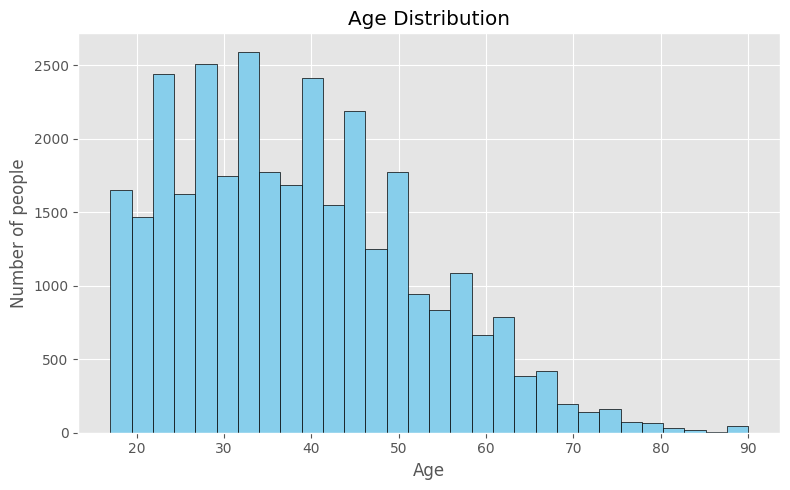

In [10]:
plt.figure(figsize=(8,5))
df["age"].plot(kind="hist", bins=30, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.tight_layout()

age_distribution=plt.show()

In [ ]:
# Bar chart shows how many people fall into each education level.
# Ordered from lowest (Preschool) to highest (Doctorate) for clarity.
# useful for workforce planning and understanding skill availability.

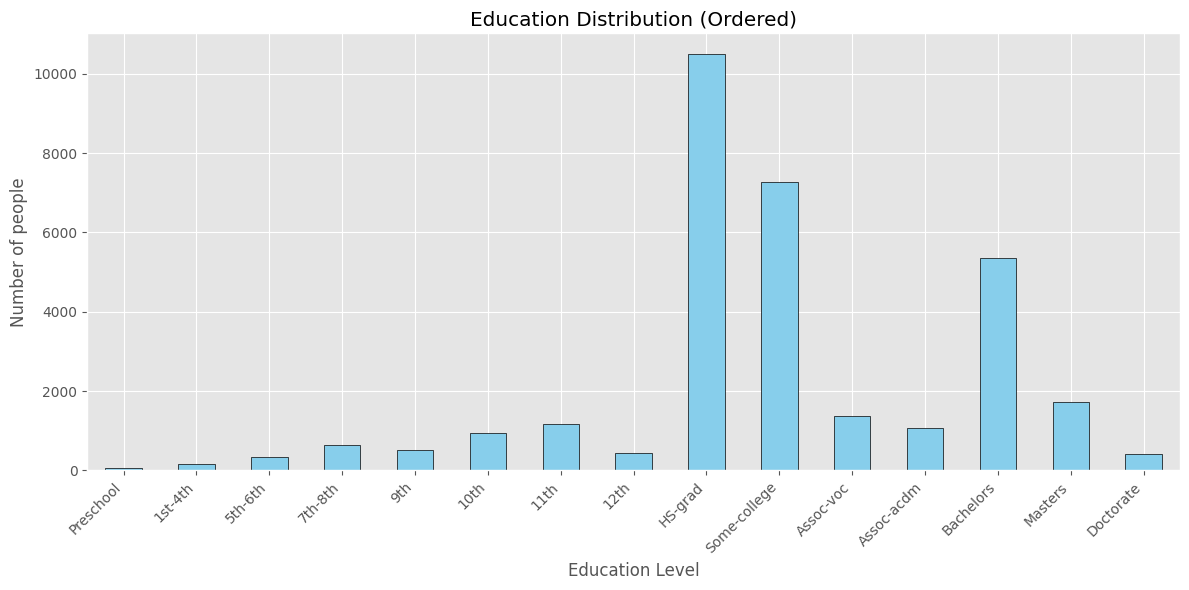

In [9]:
education_order = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
    "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", 
    "Bachelors", "Masters", "Doctorate"
]

edu_counts = df["education"].value_counts().reindex(education_order)

plt.figure(figsize=(12,6))
edu_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Education Distribution (Ordered)")
plt.xlabel("Education Level")
plt.ylabel("Number of people")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [ ]:
# Bar chart compares the number of people earning "50K or less" vs "Above 50K".
# Clear way to see income imbalance in the dataset.
# which is critical for both social insights.

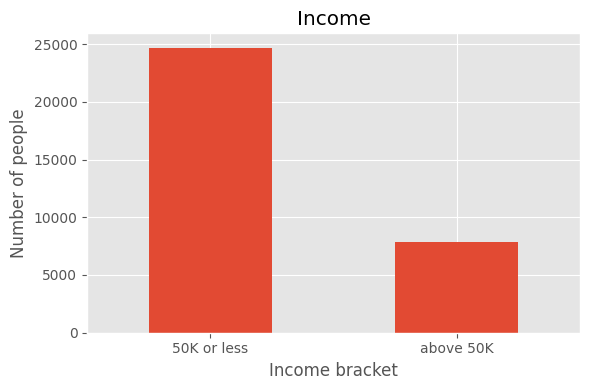

In [29]:
counts = (df["income_above_50k"].map({True: "above 50K", False: "50K or less"}).value_counts().reindex(["50K or less", "above 50K"]))

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Income")
plt.xlabel("Income bracket")
plt.ylabel("Number of people")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [ ]:
# Stacked bar chart of income buckets (50K or less vs Above 50K) split by sex
# Practical value: shows the gender distribution within each income group

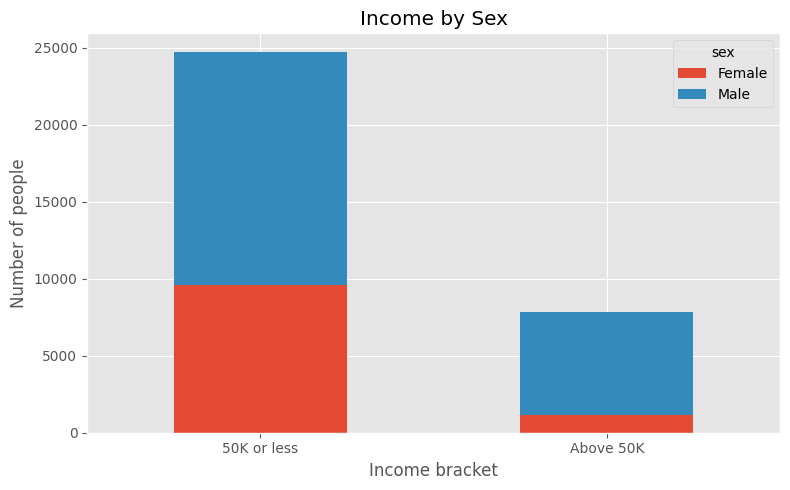

In [8]:
bucket_map = {False: "50K or less", True: "Above 50K"}


counts = (df.assign(income_bucket=df["income_above_50k"].map(bucket_map)).groupby(["income_bucket", "sex"]).size().unstack("sex", fill_value=0))

counts.plot(kind="bar", stacked=True, figsize=(8,5))

plt.title("Income by Sex")
plt.xlabel("Income bracket")
plt.ylabel("Number of people")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [ ]:
# Grouped bar chart compares income levels across education categories.
# Practical value: Demonstrates how education level influences earning potential,

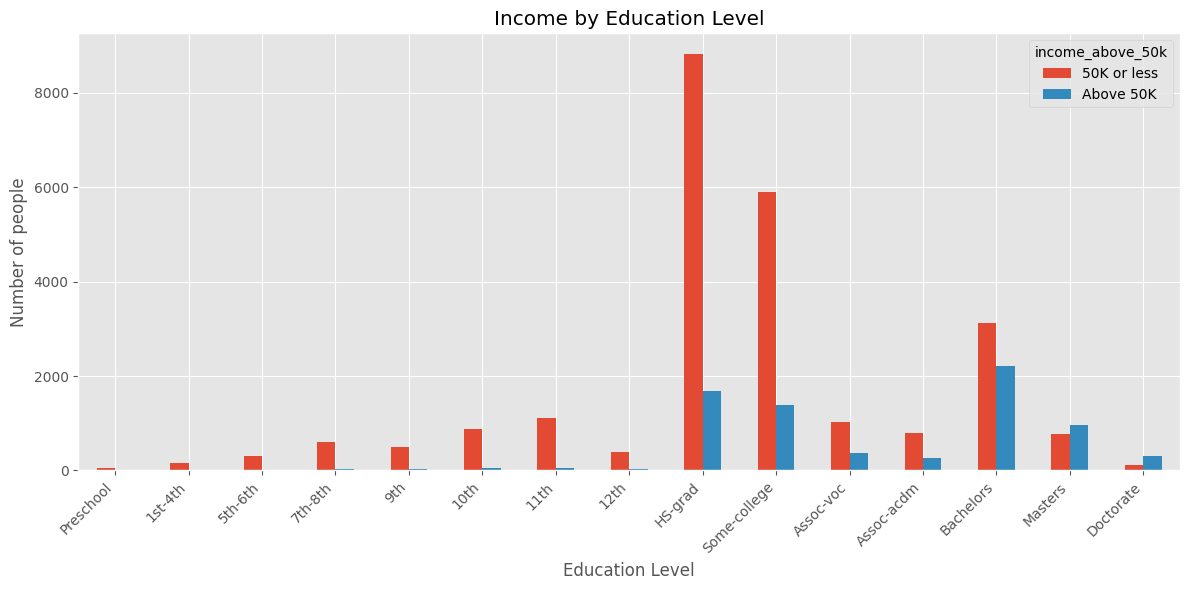

In [39]:
edu_income = pd.crosstab(df["education"], df["income_above_50k"].map({False: "50K or less", True: "Above 50K"}))


education_order = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
    "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Doctorate"
]
edu_income = edu_income.reindex(education_order)

edu_income.plot(kind="bar", figsize=(12,6))

plt.title("Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of people")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

In [ ]:
# Bar chart shows the top 10 countries in the dataset by number of people.
# Practical value: Exposes geographic imbalance (mostly US),

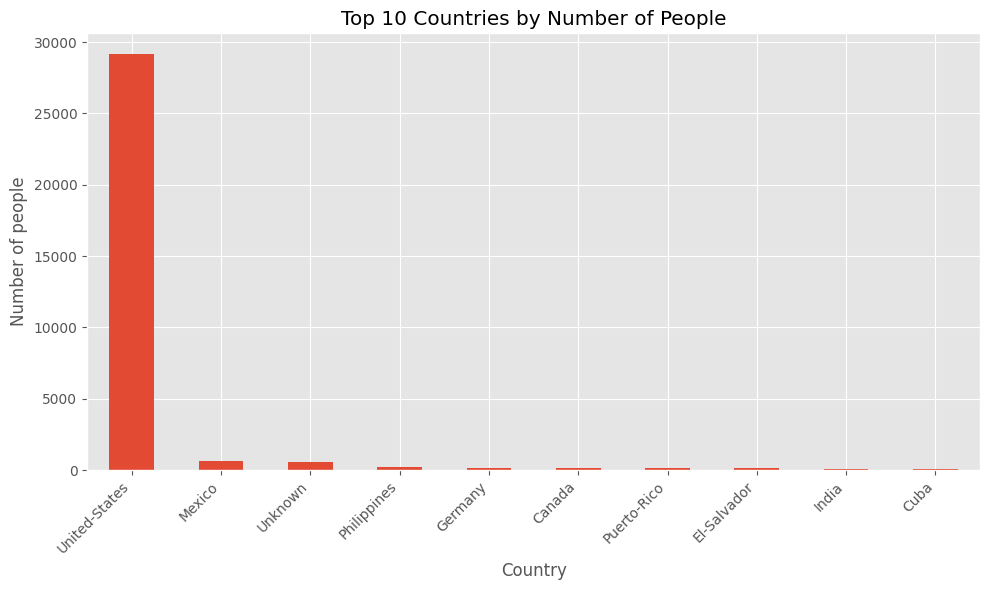

In [40]:
top_countries = df["native_country"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind="bar")

plt.title("Top 10 Countries by Number of People")
plt.xlabel("Country")
plt.ylabel("Number of people")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()